In [1]:
import matplotlib.pyplot as plt
import torch
import numpy as np
import os
from ctd.comparison.analysis.tt.tt import Analysis_TT 
from ctd.comparison.analysis.tt.tasks.tt_RandomTarget import TT_RandomTarget
from ctd.comparison.analysis.dd.dd import Analysis_DD
# Import pca
import dotenv
from ctd.comparison.comparison import Comparison

dotenv.load_dotenv(dotenv.find_dotenv())

True

/home/csverst/Github/CtDBenchmark/


/home/csverst/Github/CtDBenchmark/ctd/comparison/analysis/tt/tasks/tt_RandomTarget.py:86: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at ../aten/src/ATen/native/IndexingUtils.h:27.)
  pre_ind = pre_ind[lats_flag].detach().numpy().astype(int)
/home/csverst/Github/CtDBenchmark/ctd/comparison/analysis/tt/tasks/tt_RandomTarget.py:87: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at ../aten/src/ATen/native/IndexingUtils.h:27.)
  post_ind = post_ind[lats_flag].detach().numpy().astype(int)
/home/csverst/Github/CtDBenchmark/ctd/comparison/analysis/tt/tasks/tt_RandomTarget.py:90: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at ../aten/src/ATen/native/IndexingUtils.h:27.)
  latents = latents[lats_flag, :, :].detach().numpy()


Writing frame 0 of 40
Writing frame 1 of 40
Writing frame 2 of 40
Writing frame 3 of 40
Writing frame 4 of 40
Writing frame 5 of 40
Writing frame 6 of 40
Writing frame 7 of 40
Writing frame 8 of 40
Writing frame 9 of 40
Writing frame 10 of 40
Writing frame 11 of 40
Writing frame 12 of 40
Writing frame 13 of 40
Writing frame 14 of 40
Writing frame 15 of 40
Writing frame 16 of 40
Writing frame 17 of 40
Writing frame 18 of 40
Writing frame 19 of 40
Writing frame 20 of 40
Writing frame 21 of 40
Writing frame 22 of 40
Writing frame 23 of 40
Writing frame 24 of 40
Writing frame 25 of 40
Writing frame 26 of 40
Writing frame 27 of 40
Writing frame 28 of 40
Writing frame 29 of 40
Writing frame 30 of 40
Writing frame 31 of 40
Writing frame 32 of 40
Writing frame 33 of 40
Writing frame 34 of 40
Writing frame 35 of 40
Writing frame 36 of 40
Writing frame 37 of 40
Writing frame 38 of 40
Writing frame 39 of 40


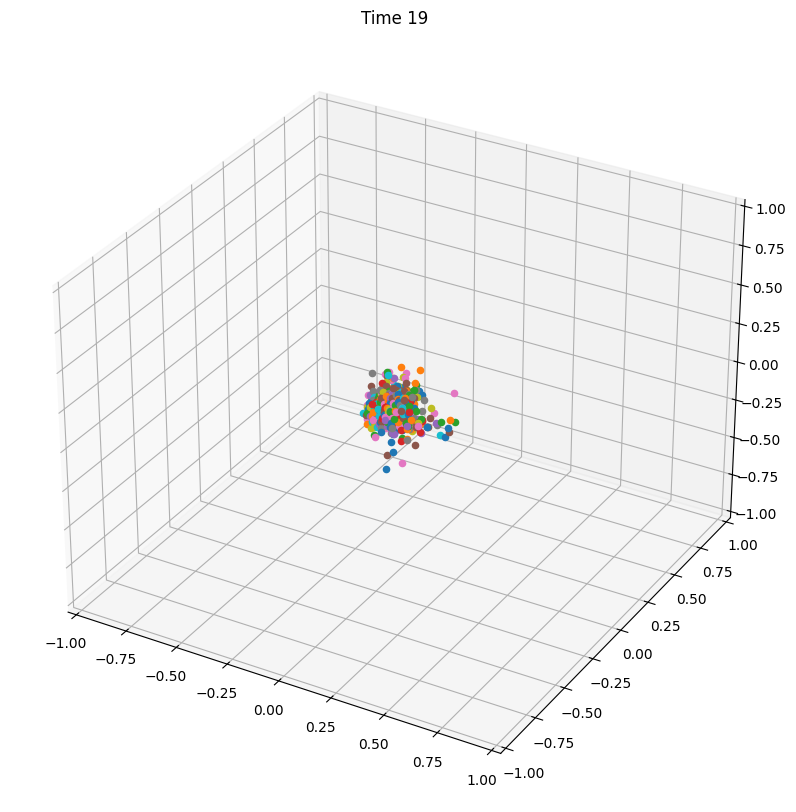

In [2]:
HOME_DIR = os.environ['HOME_DIR']
print(HOME_DIR)

pathTT = HOME_DIR + 'content/trained_models/task-trained/20240419_RandomTarget_NoisyGRU_Final/max_epochs=1500 latent_size=64 seed=0/'
an_TT = TT_RandomTarget(run_name = "TT", filepath = pathTT)

# pathDD = pathTT + "20240402_NBFF_LFADS_DD_WDecay_Sweep2/gen_model=GRU_RNN prefix=20240328_NBFF_GRU_Final seed=0 max_epochs=1500 weight_decay=0.001/"
# an_DD = Analysis_DD(run_name = "DD", filepath = pathDD, model_type = "LFADS")
# an_TT.generate_latent_video(dims_by= "PCA")
an_TT.plot_latents_aligned_video()


Iteration 10/4000
q = 1.83E-01 +/- 6.12E-02
dq = 1.86E-02 +/- 9.62E-03

Iteration 20/4000
q = 7.76E-02 +/- 3.28E-02
dq = 7.15E-03 +/- 4.41E-03

Iteration 30/4000
q = 3.86E-02 +/- 2.12E-02
dq = 3.69E-03 +/- 2.44E-03

Iteration 40/4000
q = 2.17E-02 +/- 1.51E-02
dq = 2.41E-03 +/- 1.76E-03

Iteration 50/4000
q = 1.40E-02 +/- 1.14E-02
dq = 1.62E-03 +/- 1.29E-03

Iteration 60/4000
q = 9.97E-03 +/- 8.85E-03
dq = 1.25E-03 +/- 9.85E-04

Iteration 70/4000
q = 7.83E-03 +/- 7.02E-03
dq = 1.07E-03 +/- 8.63E-04

Iteration 80/4000
q = 6.58E-03 +/- 5.49E-03
dq = 9.28E-04 +/- 8.51E-04

Iteration 90/4000
q = 5.84E-03 +/- 4.56E-03
dq = 9.05E-04 +/- 7.41E-04

Iteration 100/4000
q = 5.36E-03 +/- 3.76E-03
dq = 8.84E-04 +/- 7.17E-04

Iteration 110/4000
q = 5.00E-03 +/- 3.08E-03
dq = 8.66E-04 +/- 6.70E-04

Iteration 120/4000
q = 4.75E-03 +/- 2.63E-03
dq = 8.47E-04 +/- 6.55E-04

Iteration 130/4000
q = 4.62E-03 +/- 2.34E-03
dq = 8.26E-04 +/- 6.10E-04

Iteration 140/4000
q = 4.46E-03 +/- 2.07E-03
dq = 7.98E-04 

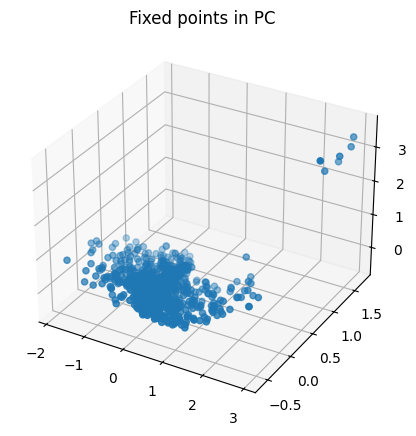

In [3]:
tt_fps = an_TT.compute_coupled_FPs(
    learning_rate=5e-3,
    noise_scale=0.1,
    n_inits = 1000,
    max_iters=4000,
    device = "cpu",
)


In [4]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

go_cues = an_TT.get_extra_inputs()[:,1]

x_star = tt_fps.xstar
print(x_star.shape)
# Split xstar into rnn_xstar and env_xstar [64, 14] respectively

env_xstar = x_star[:, :14]
rnn_xstar = x_star[:, 14:]
print(env_xstar.shape)
rnn_pca = PCA(n_components=3)
env_pca = PCA(n_components=3)

rnn_xstar_pca = rnn_pca.fit_transform(rnn_xstar)
env_xstar_pca = env_pca.fit_transform(env_xstar)

lats = an_TT.get_latents()
n_trials, n_time, n_latent = lats.shape
go_flag = go_cues > 0
inputs = an_TT.get_model_inputs()[2]
print(inputs.shape)

targs_end = inputs[go_flag,-1,:2].detach().numpy()
lats_end = lats[go_flag,-1,:].detach().numpy()
targs_start = inputs[go_flag,5,:2].detach().numpy()
lats_start = lats[go_flag,5,:].detach().numpy()

lats = lats.detach().cpu().numpy()
lm_end = LinearRegression().fit(lats_end, targs_end)
lats_targ = lm_end.predict(lats.reshape(-1, lats.shape[-1]))
lats_targ = lats_targ.reshape(n_trials,n_time, 2)
                           

lm_start = LinearRegression().fit(lats_start, targs_start)
lats_start = lm_start.predict(lats.reshape(-1, lats.shape[-1]))
lats_start = lats_start.reshape(n_trials,n_time, 2)


n_trials, n_time, n_latent = lats.shape
print(lats.shape)
lats = lats.reshape(-1, lats.shape[-1])
lats_pca = rnn_pca.transform(lats)
lats_pca = lats_pca.reshape(n_trials,n_time, 3)

rnn_xstar_targ = lm_end.predict(rnn_xstar)
rnn_xstar_start = lm_start.predict(rnn_xstar)



(1000, 78)
(1000, 14)
torch.Size([1000, 300, 2])
(1000, 300, 64)


In [5]:


def find_null_space(model):
    """
    Computes the null space of the coefficient matrix of a fitted LinearRegression model
    with multiple outputs.

    Parameters:
    model (LinearRegression): A fitted sklearn LinearRegression model.

    Returns:
    np.ndarray: A basis for the null space of the coefficient matrix.
    """
    # Coefficients of the model, shape [n_outputs, n_features] -> [2, 64]
    coef_matrix = model.coef_

    # Compute the Singular Value Decomposition (U, S, Vh) of the coefficient matrix
    U, S, Vh = np.linalg.svd(coef_matrix)

    # Identify zero (or nearly zero) singular values (adjust the tolerance if needed)
    tol = 1e-5
    rank = np.sum(S > tol)

    # Null space basis from the remaining columns of Vh
    null_space_basis = Vh.T[:, rank:]

    return null_space_basis
# Find neural activity orthogonal to the lm_end model
# Get the x target decoder vector

coefs = lm_end.coef_
U,S, Vh = np.linalg.svd(coefs)
print(Vh.shape)

null_space = find_null_space(lm_end)
lats_null = np.dot(lats, null_space)
lats_null = np.dot(lats_null, null_space.T)
preds = lm_end.predict(lats_null)

pca_null = PCA(n_components=1)
lats_null_pca = pca_null.fit_transform(lats_null)
lats_null_pca = lats_null_pca.reshape(n_trials, n_time, 1)

xstar_null = np.dot(rnn_xstar, null_space)
xstar_null = np.dot(xstar_null, null_space.T)

xstar_null_pca = pca_null.transform(xstar_null)


# 

(64, 64)


TypeError: only integer tensors of a single element can be converted to an index

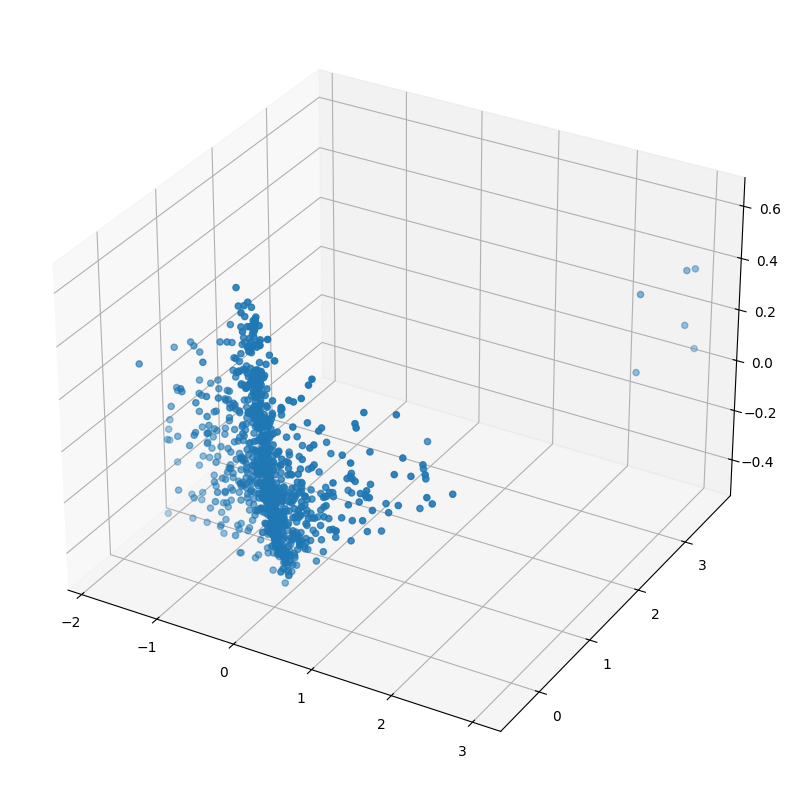

In [6]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rnn_xstar_pca[:, 0], rnn_xstar_pca[:, 1], rnn_xstar_pca[:, 2])
for i in range(100):
    ax.plot(lats_pca[i, go_cues[i]:, 0], lats_pca[i, go_cues[i]:, 1], lats_pca[i, go_cues[i]:, 2])
ax.scatter(lats_pca[:100,0,0], lats_pca[:100,0,1], lats_pca[:100,0,2], c='g')
ax.scatter(lats_pca[:100,-1,0], lats_pca[:100,-1,1], lats_pca[:100,-1,2], c='r')
# ax.set_xlim(-1, 0)
# ax.set_ylim(-1, 1)
# ax.set_zlim(-1, 1)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

In [ ]:
go_cues = an_TT.get_extra_inputs()[:,1].detach().numpy().astype(int)
go_cues = go_cues[go_cues > 0]
print(go_cues.shape)
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xstar_null_pca[:, 0],rnn_xstar_targ[:, 0],   rnn_xstar_targ[:, 1], c = 'g', label = "Fixed Points")
for i in range(100):
    ax.plot(lats_null_pca[i, go_cues[i]:, 0], lats_targ[i, go_cues[i]:, 0],  lats_targ[i, go_cues[i]:, 1], c='k')
# ax.scatter(lats_null_pca[:100,0,0], lats_targ[:100,0,0],  lats_targ[:100,0,1], c='g')
# ax.scatter( lats_null_pca[:100,-1,0], lats_targ[:100,-1,0], lats_targ[:100,-1,1], c='r')
ax.set_xlim(-1.5, 1.2)
ax.set_ylim(-0.5, 1)
ax.set_zlim(-0.5, 0.5)
ax.set_xlabel("Target Decoder Null-Space PC 1")
ax.set_ylabel("Target X Decoder")
ax.set_zlabel("Target Y Decoder")

ax.set_title("Fixed Points from MotorNet (Target Decoder dimensions)")
# Tight layout
plt.tight_layout()
plt.savefig("fixed_points_target_decoder.pdf")

In [ ]:

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(env_xstar_pca[:, 0], env_xstar_pca[:, 1], env_xstar_pca[:, 2])

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(env_xstar[:, -2], env_xstar[:, -1])